## Supervised learning 

In [116]:
# import the appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

removing irrelevant features ?-> Chi-squared // not done in exercises

standardization

on va faire du cross validation parce qu'on a un petit dataset
quand même besoin de garder un set de côté pour après ou paaasssss ???

Methods 
- kNN
    - no training needed
    - accuracy improves with more data -> AHHH
    - Hyperparameters: k and distance fct
    - Choose k with LOO crossvalidation

- Linear and logistic regression -> problem: sortie multiclass
    - use ridge regression to already have regularization
    - get_dummies to convert sex to numerical (série 6)

- convolutionnal neural network
    - pas vu en cours mais donne bons résultats normalement 

asses results : confusion matrix -> precision and recall

In [117]:
# load data
data = pd.read_csv('merge_features_filtered.csv')
data.head()

,Trope,CharacterName,ActorName,ActorDOB,MovieName,Genres,Decade,ReleaseDate,BoxOffice,ActorID,...,actorID=341,actorID=342,actorID=343,Eye Distance,Eye Position,Nose Length,Nose Width,Eyebrow Length,Face Shape,Cheek Bones
0,evil_character,Aaron Hallam,Benicio del Toro,1967.0,The Hunted,"['Thriller', 'Crime Fiction', 'Action', 'Drama']",2000.0,2003.0,45496534.0,137.0,...,0.892761,0.820569,0.772236,0.267677,0.948980,0.373469,0.200337,0.340909,1.212245,0.183502
1,mean_officer,Abel Turner,Samuel L. Jackson,1948.0,Lakeview Terrace,"['Thriller', 'Crime Thriller', 'Drama', 'Psych...",2000.0,2008.0,44653637.0,273.0,...,1.058803,0.971612,1.004091,0.286885,0.949698,0.344064,0.260656,0.336885,1.227364,0.198361
2,charismatic_charmer,Abu,Sabu Dastagir,1924.0,The Thief of Bagdad,"['Adventure', 'Costume drama', 'Action/Adventu...",1940.0,1940.0,NaN,72.0,...,0.867241,0.812289,0.863133,0.261780,0.961039,0.396104,0.183246,0.348168,1.240260,0.170157
3,charismatic_charmer,Achilles,Brad Pitt,1963.0,Troy,"['Sword and Sandal', 'Adventure', 'Costume dra...",2000.0,2004.0,497409852.0,193.0,...,0.842054,0.782616,0.786956,0.264151,0.939914,0.347639,0.188679,0.328302,1.137339,0.141509
4,laidback_freebird,Agatha,Samantha Morton,1977.0,Minority Report,"['Crime Fiction', 'Thriller', 'Science Fiction...",2000.0,2002.0,358372926.0,178.0,...,0.872403,0.907091,0.919244,0.244406,0.931193,0.410550,0.175559,0.327022,1.332569,0.166093


In [118]:
data.columns

Index(['Trope', 'CharacterName', 'ActorName', 'ActorDOB', 'MovieName',
       'Genres', 'Decade', 'ReleaseDate', 'BoxOffice', 'ActorID',
       ...
       'actorID=341', 'actorID=342', 'actorID=343', 'Eye Distance',
       'Eye Position', 'Nose Length', 'Nose Width', 'Eyebrow Length',
       'Face Shape', 'Cheek Bones'],
      dtype='object', length=493)

Sabu Dastagir doesn't have its height on wikidata -> we are going to enter the values by hand

In [119]:
data.loc[data.loc[data['ActorName'] == 'Sabu Dastagir'].index,'ActorHeight'] = 1.68
data.loc[data.loc[data['ActorName'] == 'Billie Whitelaw'].index,'ActorHeight'] = 1.57
data.loc[data.loc[data['ActorName'] == "Paige O'Hara"].index,'ActorHeight'] = 1.67
data.loc[data.loc[data['ActorName'] == "Alex Winter"].index,'ActorHeight'] = 1.70
data.loc[data.loc[data['ActorName'] == "Günter Lamprecht"].index,'ActorHeight'] = 1.82
data.loc[data.loc[data['ActorName'] == "Dan O'Herlihy"].index,'ActorHeight'] = 1.84
data.loc[data.loc[data['ActorName'] == "Brigitte Auber"].index,'ActorHeight'] = 1.61
data.loc[data.loc[data['ActorName'] == "Edmund Gwenn"].index,'ActorHeight'] = 1.65
data.loc[data.loc[data['ActorName'] == "Richard White"].index,'ActorHeight'] = 1.85
data.loc[data.loc[data['ActorName'] == "Peter Finch"].index,'ActorHeight'] = 1.75
data.loc[data.loc[data['ActorName'] == "David Murray"].index,'ActorHeight'] = 1.83
data.loc[data.loc[data['ActorName'] == "Lil Dagover"].index,'ActorHeight'] = 1.60
data.loc[data.loc[data['ActorName'] == "Lance Fenton"].index,'ActorHeight'] = 1.83
data.loc[data.loc[data['ActorName'] == "Jean Hagen"].index,'ActorHeight'] = 1.63
data.loc[data.loc[data['ActorName'] == "Wayne Morris"].index,'ActorHeight'] = 1.88
data.loc[data.loc[data['ActorName'] == "Ronald Lacey"].index,'ActorHeight'] = 1.73
data.loc[data.loc[data['ActorName'] == "Norman Lloyd"].index,'ActorHeight'] = 1.78
data.loc[data.loc[data['ActorName'] == "Junjie Qin"].index,'ActorHeight'] = 1.80
data.loc[data.loc[data['ActorName'] == "Michael McShane"].index,'ActorHeight'] = 1.83
data.loc[data.loc[data['ActorName'] == "Steve Guttenberg"].index,'ActorHeight'] = 1.83
data.loc[data.loc[data['ActorName'] == "Zack Ward"].index,'ActorHeight'] = 1.78
data.loc[data.loc[data['ActorName'] == "Takashi Matsuyama"].index,'ActorHeight'] = 1.73
data.loc[data.loc[data['ActorName'] == "John Larch"].index,'ActorHeight'] = 1.85
data.loc[data.loc[data['ActorName'] == "Robbie Gee"].index,'ActorHeight'] = 1.81
data.loc[data.loc[data['ActorName'] == "Kevin Gage"].index,'ActorHeight'] = 1.80
data.loc[data.loc[data['ActorName'] == "John Lynch"].index,'ActorHeight'] = 1.77
data.loc[data.loc[data['ActorName'] == "Nicholas Bell"].index,'ActorHeight'] = 1.84


(array([  8.,  18.,  66., 153., 150.,  91.,   6.,   0.,   0.,   2.]),
 array([1.5  , 1.574, 1.648, 1.722, 1.796, 1.87 , 1.944, 2.018, 2.092,
        2.166, 2.24 ]),
 <BarContainer object of 10 artists>)

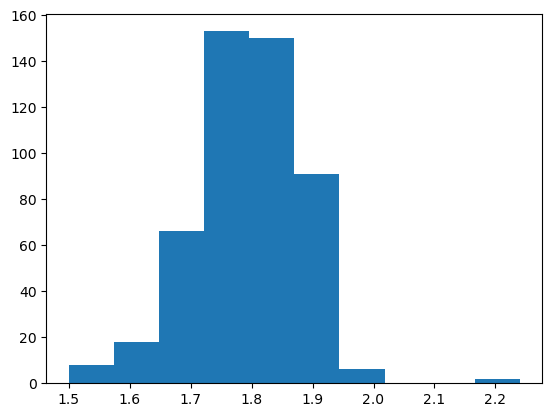

In [120]:
#to check that all the heights are in m, plot histogram of values 
plt.hist(data['ActorHeight'])

removed actorDOB (have age) and ethnicity (shitty data) + all facial measurements that are not encodings and ActorID

In [131]:
filtered_data = data.filter(regex='^encod').copy()
# filtered_data.loc[:, 'Trope', 'CharacterName', 'ActorName', 'Genres', 'ReleaseDate', 'BoxOffice', 'ActorID', 'ActorGender', 'ActorHeight', 'ActorAge'] = data['Trope']
filtered_data[['Trope', 'CharacterName', 'ActorName', 'Genres', 'ReleaseDate', 'BoxOffice', 'ActorGender', 'ActorHeight', 'ActorAge']] = data[['Trope', 'CharacterName', 'ActorName', 'Genres', 'ReleaseDate', 'BoxOffice', 'ActorGender', 'ActorHeight', 'ActorAge']]

In [133]:
X_data = filtered_data.drop(['Trope', 'CharacterName', 'ActorName', 'Genres', 'ReleaseDate', 'BoxOffice'], axis=1)
X_data.isna().sum().sum()
# drop trop because it is the target, and others because don't give info on DNA
X_num_data = pd.get_dummies(X_data)
X_num_data.head()

,encod_1,encod_2,encod_3,encod_4,encod_5,encod_6,encod_7,encod_8,encod_9,encod_10,...,encod_123,encod_124,encod_125,encod_126,encod_127,encod_128,ActorHeight,ActorAge,ActorGender_F,ActorGender_M
0,-0.023657,0.013074,0.100215,0.052788,-0.104148,-0.070959,-0.100003,-0.109750,0.114015,-0.007281,...,-0.123855,-0.114730,0.052553,0.053704,0.021263,-0.015822,1.85,36.0,False,True
1,-0.091814,0.054529,0.108909,0.016781,-0.026502,-0.206125,0.053686,-0.058922,0.042997,-0.010095,...,-0.046522,-0.017672,0.017082,0.045557,-0.021104,-0.002589,1.89,60.0,False,True
2,-0.101247,0.094492,0.007732,-0.067323,-0.049990,-0.076913,-0.069657,-0.117803,0.126661,-0.058415,...,-0.167384,-0.142060,0.064959,-0.001954,0.115502,0.009860,1.68,16.0,False,True
3,-0.075457,0.140108,0.089564,-0.074610,-0.117367,0.001497,-0.069144,-0.040033,0.167782,-0.061298,...,-0.140665,-0.097316,0.036600,-0.038961,0.062496,0.044058,1.80,41.0,False,True
4,-0.057926,0.007716,0.044297,-0.108322,-0.085588,0.027153,0.038360,-0.094867,0.180237,-0.082163,...,-0.274500,-0.044019,0.053764,-0.122054,-0.002090,0.096536,1.60,25.0,True,False


In [125]:

y_data = filtered_data[['Trope']]
len = y_data.size
y_data = y_data.values.reshape(len,)

#simple KNN implementation
K = 3
KNN_Classifier = KNeighborsClassifier(n_neighbors=K)
KNN_Classifier.fit(X_num_data, y_data)

y_pred = cross_val_predict(KNN_Classifier, X_num_data.values, y_data, cv=5)
report = classification_report(y_data, y_pred)
print(report)

                     precision    recall  f1-score   support

charismatic_charmer       0.22      0.52      0.31        54
      crazy_fighter       0.11      0.25      0.16        36
  crazy_jealous_guy       0.05      0.08      0.06        25
    dumb_and_clumsy       0.32      0.33      0.33        36
   emotional_damage       0.14      0.12      0.13        17
     evil_character       0.03      0.04      0.03        26
               jock       0.00      0.00      0.00        27
  laidback_freebird       0.47      0.40      0.43        35
              loser       0.10      0.04      0.06        25
       mean_officer       0.04      0.02      0.03        48
    old_wise_quirky       0.25      0.17      0.20        24
   respected_leader       0.00      0.00      0.00        25
shallow_and_popular       0.46      0.42      0.44        31
           sidekick       0.00      0.00      0.00        21
     skilled_badass       0.00      0.00      0.00        50
        tech_genius    

essai de weighted KNN mais résultats pas mieux

In [134]:
from sklearn.preprocessing import StandardScaler

# Assume X_num_data is your DataFrame
scaler = StandardScaler()

# Suppose 'important_feature1' and 'important_feature2' are the features you want to give more importance
X_num_data[['ActorGender_F', 'ActorGender_M', 'ActorHeight', 'ActorAge']] *= 10

# Fit the scaler to the data
X_scaled = scaler.fit_transform(X_num_data)

# Now you can use X_scaled in your KNN classifier
KNN_Classifier.fit(X_scaled, y_data)

KNeighborsClassifier(n_neighbors=1)

In [135]:
#KNN with tuning of K

k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# perform the search with CV
loo = LeaveOneOut()
grid = GridSearchCV(KNN_Classifier, param_grid, cv=loo, scoring='accuracy')
grid.fit(X_num_data.values, y_data)
results = grid.cv_results_

# Print the best score and the best K
print("Best score: %0.2f" % grid.best_score_)
best_K = grid.best_estimator_.get_params()['n_neighbors']
print("Best K:", best_K)

Best score: 0.20
Best K: 1


In [136]:
# Use the best parameters to fit the KNN model
KNN_Classifier = KNeighborsClassifier(n_neighbors=best_K)
KNN_Classifier.fit(X_num_data, y_data)

# Make predictions
y_pred = cross_val_predict(KNN_Classifier, X_num_data.values, y_data, cv=5)

report = classification_report(y_data, y_pred)
print(report)

                     precision    recall  f1-score   support

charismatic_charmer       0.26      0.28      0.27        54
      crazy_fighter       0.18      0.25      0.21        36
  crazy_jealous_guy       0.00      0.00      0.00        25
    dumb_and_clumsy       0.19      0.22      0.20        36
   emotional_damage       0.11      0.12      0.11        17
     evil_character       0.08      0.08      0.08        26
               jock       0.21      0.11      0.15        27
  laidback_freebird       0.40      0.49      0.44        35
              loser       0.04      0.04      0.04        25
       mean_officer       0.00      0.00      0.00        48
    old_wise_quirky       0.27      0.25      0.26        24
   respected_leader       0.08      0.08      0.08        25
shallow_and_popular       0.24      0.26      0.25        31
           sidekick       0.10      0.10      0.10        21
     skilled_badass       0.07      0.06      0.06        50
        tech_genius    

In [ ]:
filtered_data = data[['Trope', 'CharacterName', 'ActorName', 'Genres', 'ReleaseDate', 'BoxOffice', 'ActorID', 'ActorGender', 'ActorHeight', 'ActorAge', 'Eye Position', 'Nose Length', 'Nose Width', 'Eyebrow Length', 'Face Shape', 'Cheek Bones']]
filtered_data.head()
# use encodings instead of ratios

,Trope,CharacterName,ActorName,Genres,ReleaseDate,BoxOffice,ActorID,ActorGender,ActorHeight,ActorAge,Eye Position,Nose Length,Nose Width,Eyebrow Length,Face Shape,Cheek Bones
0,evil_character,Aaron Hallam,Benicio del Toro,"['Thriller', 'Crime Fiction', 'Action', 'Drama']",2003.0,45496534.0,137.0,M,1.85,36.0,0.948980,0.373469,0.200337,0.340909,1.212245,0.183502
1,mean_officer,Abel Turner,Samuel L. Jackson,"['Thriller', 'Crime Thriller', 'Drama', 'Psych...",2008.0,44653637.0,273.0,M,1.89,60.0,0.949698,0.344064,0.260656,0.336885,1.227364,0.198361
2,charismatic_charmer,Abu,Sabu Dastagir,"['Adventure', 'Costume drama', 'Action/Adventu...",1940.0,NaN,72.0,M,1.68,16.0,0.961039,0.396104,0.183246,0.348168,1.240260,0.170157
3,charismatic_charmer,Achilles,Brad Pitt,"['Sword and Sandal', 'Adventure', 'Costume dra...",2004.0,497409852.0,193.0,M,1.80,41.0,0.939914,0.347639,0.188679,0.328302,1.137339,0.141509
4,laidback_freebird,Agatha,Samantha Morton,"['Crime Fiction', 'Thriller', 'Science Fiction...",2002.0,358372926.0,178.0,F,1.60,25.0,0.931193,0.410550,0.175559,0.327022,1.332569,0.166093


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assume X_num_data is your DataFrame
scaler = StandardScaler()

# Suppose 'important_feature1' and 'important_feature2' are the features you want to give more importance
X_num_data[['important_feature1', 'important_feature2']] *= 10

# Fit the scaler to the data
X_scaled = scaler.fit_transform(X_num_data)

# Now you can use X_scaled in your KNN classifier
KNN_Classifier.fit(X_scaled, y_data)